In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import random
import math
import statistics as st

In [3]:
def flip_coin():
    return random.choice(["H","T"])

In [4]:
def flip_coin_lots(n=2**16):
    intervals = {}
    heads = 0.1
    tails = 0.1
    for i in range(1,n+1):
        flip = flip_coin()
        if flip =="H":
            heads += 1
        elif flip == "T":
            tails += 1
        else:
            raise ValueError("")
        if math.log2(i).is_integer():
            intervals[i] = {'heads':heads,'tails':tails}
    if n not in intervals:
        intervals[n] = {'heads':heads,'tails':tails}
    return intervals
        

In [5]:
def fast_flip_lots(n):
    heads = 0
    tails = 0
    for i in range(n):
        flip = flip_coin()
        if flip == "H":
            heads += 1
        elif flip == 'T':
            tails +=1
    return {'heads':heads,'tails':tails}

In [6]:
data = flip_coin_lots()


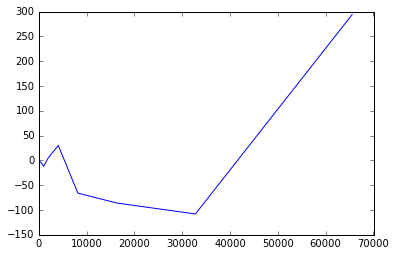

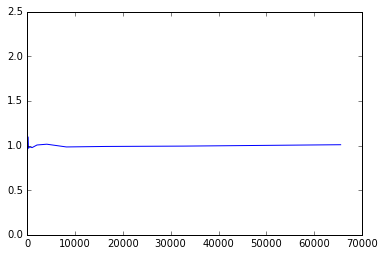

In [7]:
x_vals = list(data.keys())
x_vals.sort()

plt.plot(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.show()
plt.plot(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.show()

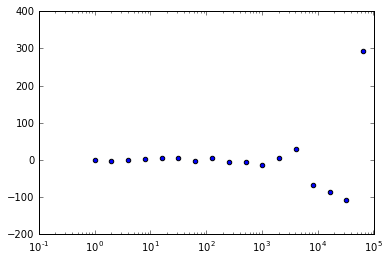

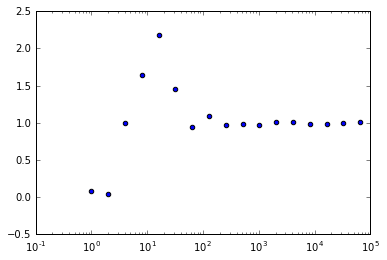

In [8]:
plt.scatter(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()

In [9]:
repetition_data = []
for i in range(20):
    repetition_data.append(flip_coin_lots())


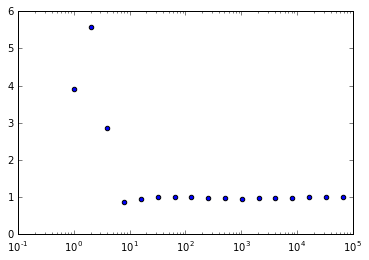

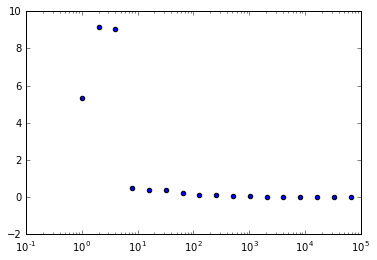

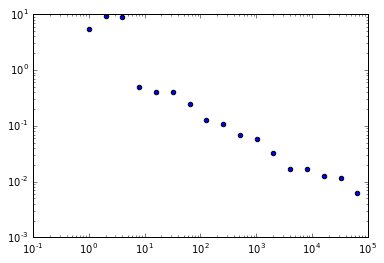

In [10]:

plt.scatter(x_vals,[st.mean([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.ylim(.001,10)
plt.yscale('log')
plt.show()

In [11]:
hundred_flips = list(range(100000))
for i in range(100000):
    temp_data = fast_flip_lots(100)
    hundred_flips[i] = (temp_data['heads']/temp_data['tails'])


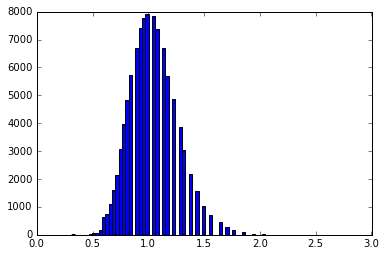

In [12]:
plt.hist(hundred_flips, bins = 80)
plt.show()

In [14]:
thousand_flips = list(range(100000))
for i in range(100000):
    temp_data = fast_flip_lots(1000)
    thousand_flips[i] = (temp_data['heads']/temp_data['tails'])

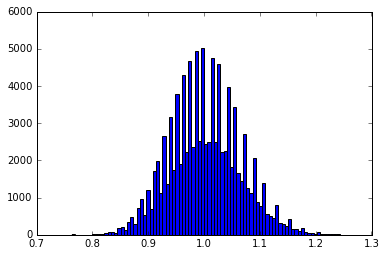

In [18]:
plt.hist(thousand_flips, bins = 90)
plt.show()

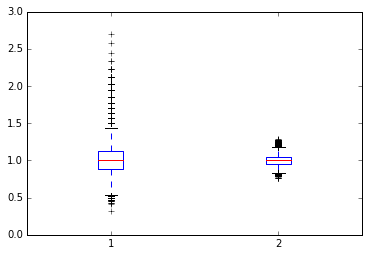

In [20]:
plt.boxplot([hundred_flips, thousand_flips])
plt.show()